### Chloropleth maps

#### TODO:
- convert the ookla polygons to markers based centroid
- convert the cira data to shapely? format
- count up the number of test that fall within each boundary

#### Questions
- how to handle area intersections

In [3]:
import geopandas as gpd
import pandas as pd
from pathlib import Path

#### Data Loading

In [4]:
file_path = Path("../data/Municipal_Boundaries_SHP_Geographic/")

In [5]:
city_df = gpd.read_file(file_path/"CITY.shp")
hamlet_df = gpd.read_file(file_path/"HAMLETPT.shp")
indian_df = gpd.read_file(file_path/"INDIAN.shp")
octext_df = gpd.read_file(file_path/"OCTEXT.shp")

rural_df = gpd.read_file(file_path/"RURAL.shp")
svillage_df = gpd.read_file(file_path/"SVILLAGE.shp")
town_df = gpd.read_file(file_path/"TOWN.shp")
urbserv_df = gpd.read_file(file_path/"urbserv.shp")
village_df = gpd.read_file(file_path/"VILLAGE.shp")

In [78]:
print(city_df.crs, rural_df.crs)

epsg:4269 epsg:4269


In [6]:
ookla_df = gpd.read_file("../data/ookla/AB_ookla_data_2020.shp")

In [52]:
# load in the cira df as gpd, with crs?
cira = pd.read_csv("../data/cira-internet-performance.csv")

In [53]:
cira.head()

,TEST ID,TEST DATE / UTC HOUR,GEO LATITUDE,GEO LONGITUDE,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,IPV6 SUPPORTED,...,TEST SERVER,browser_test_url,CONTRACTED DOWNLOAD SPEED,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,USER COMMENTS,HEATMAP_MUNICIPALITY
0,366,2015-05-20 10:01,53.631757,-110.030811,1.28,0.86,NaN,NaN,NaN,False,...,Montreal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,County of Vermilion River
1,451,2015-05-22 10:00,53.381155,-113.861499,9.15,0.90,NaN,NaN,NaN,False,...,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkland County
2,460,2015-05-22 10:00,49.957702,-110.271767,0.54,0.58,NaN,NaN,NaN,False,...,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cypress County
3,1039,2015-05-20 10:00,53.474081,-112.951316,0.50,0.77,NaN,NaN,NaN,False,...,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strathcona County
4,1109,2015-05-19 10:00,51.575186,-112.869397,2.64,1.12,NaN,NaN,NaN,False,...,Calgary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Starland County


In [59]:
cira_df = gpd.GeoDataFrame(cira, geometry=gpd.points_from_xy(cira["GEO LONGITUDE"], cira["GEO LATITUDE"]))
cira_df.drop(["GEO LONGITUDE", "GEO LATITUDE"], axis=1, inplace=True)
cira_df.{'init': 'epsg:4326'}

In [76]:
print(cira_df.crs)

None


In [62]:
cira_df.head(3)

,TEST ID,TEST DATE / UTC HOUR,DOWNLOAD SPEED,UPLOAD SPEED,JITTER,LATENCY,PACKET LOSS,IPV6 SUPPORTED,DNSSEC SUPPORTED,TEST SERVER,browser_test_url,CONTRACTED DOWNLOAD SPEED,CONTRACTED UPLOAD SPEED,CONTRACTED DATA CAP,CONTRACTED MONTHLY COST,SERVICE TYPE,USER SATISFACTION,USER COMMENTS,HEATMAP_MUNICIPALITY,geometry
0,366,2015-05-20 10:01,1.28,0.86,NaN,NaN,NaN,False,False,Montreal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,County of Vermilion River,POINT (-110.03081 53.63176)
1,451,2015-05-22 10:00,9.15,0.90,NaN,NaN,NaN,False,False,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkland County,POINT (-113.86150 53.38115)
2,460,2015-05-22 10:00,0.54,0.58,NaN,NaN,NaN,False,True,Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cypress County,POINT (-110.27177 49.95770)


#### Get the Centroid of Ookla polygons
- apparently i need to project to a crs where the centroid will be in accurate? Centroid calculation seems to rely on distance, so a projection that preserves distance **(Azimuthal Equidistant projection)?**
1. Change project?
2. Do calculation?

In [37]:
ookla_df.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,quarter,conn_type,geometry
0,0212113033010133,807,273,84,1,1,Q1,fixed,"POLYGON ((-114.13147 53.53051, -114.12598 53.5..."
1,0212113123020220,82062,11294,19,34,4,Q1,fixed,"POLYGON ((-113.55469 53.46843, -113.54919 53.4..."
2,0212131212333013,9741,1382,24,7,2,Q1,fixed,"POLYGON ((-114.28528 51.20344, -114.27979 51.2..."
3,0213002023012223,81989,39432,13,56,7,Q1,fixed,"POLYGON ((-112.05505 53.49131, -112.04956 53.4..."
4,0212113301112020,4405,2300,37,3,1,Q1,fixed,"POLYGON ((-113.29102 53.29806, -113.28552 53.2..."


In [75]:
print(ookla_df.crs)

epsg:4326


In [54]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

NameError: name 'geopandas' is not defined

In [ ]:
def get_centroid(row):
    try:
        row.geometry

In [79]:
ookla_df.geometry.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
ookla_df.apply()

In [66]:
ookla_df.iloc[0].geometry.

Object `geometry` not found.


In [73]:
ookla_df.geometry.centroid.x

<ipython-input-73-46a3607d257e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ookla_df.geometry.centroid.x


0        -114.128723
1        -113.551941
2        -114.282532
3        -112.052307
4        -113.288269
             ...    
122042   -112.244568
122043   -112.079773
122044   -113.843079
122045   -112.359924
122046   -112.337952
Length: 122047, dtype: float64

In [ ]:
ookla_df["centroid"] = gpd.points_from_xy(ookla_df)

In [42]:
ookla_df.iloc[0].geometry.centroid.x, ookla_df.iloc[0].geometry.centroid.y

(-114.12872314453101, 53.5288805865756)

In [28]:
main_bound_df = pd.concat([rural_df, city_df])

In [29]:
main_bound_df.head()

,RURAL_ID,PID,GEONAME,GEOCODE,geometry,CITY_ID
0,1.0,29860,MUNICIPAL DISTRICT OF ACADIA NO. 34,0001,"POLYGON ((-110.05165 51.27041, -110.05136 51.2...",NaN
1,2.0,29863,ATHABASCA COUNTY,0012,"POLYGON ((-113.68568 54.53633, -113.68569 54.5...",NaN
2,3.0,29864,COUNTY OF BARRHEAD NO. 11,0015,"POLYGON ((-114.05164 53.92673, -114.05164 53.9...",NaN
3,4.0,29865,BEAVER COUNTY,0020,"POLYGON ((-113.00114 53.29425, -113.00114 53.2...",NaN
4,5.0,29869,MUNICIPAL DISTRICT OF BONNYVILLE NO. 87,0036,"POLYGON ((-110.35209 53.82412, -110.35207 53.8...",NaN


In [31]:
city_df.head()

,CITY_ID,PID,GEONAME,GEOCODE,geometry
0,1,30130,CITY OF AIRDRIE,0003,"POLYGON ((-114.06034 51.32935, -114.04884 51.3..."
1,2,29919,CITY OF BEAUMONT,0019,"POLYGON ((-113.46430 53.36665, -113.46430 53.3..."
2,3,29928,CITY OF BROOKS,0043,"POLYGON ((-111.86062 50.57026, -111.86044 50.5..."
3,4,30131,CITY OF CALGARY,0046,"POLYGON ((-113.86556 51.01609, -113.87704 51.0..."
4,5,30132,CITY OF CAMROSE,0048,"POLYGON ((-112.86397 53.03972, -112.86388 53.0..."


In [13]:
rural_df.head()

,RURAL_ID,PID,GEONAME,GEOCODE,geometry
0,1,29860,MUNICIPAL DISTRICT OF ACADIA NO. 34,0001,"POLYGON ((-110.05165 51.27041, -110.05136 51.2..."
1,2,29863,ATHABASCA COUNTY,0012,"POLYGON ((-113.68568 54.53633, -113.68569 54.5..."
2,3,29864,COUNTY OF BARRHEAD NO. 11,0015,"POLYGON ((-114.05164 53.92673, -114.05164 53.9..."
3,4,29865,BEAVER COUNTY,0020,"POLYGON ((-113.00114 53.29425, -113.00114 53.2..."
4,5,29869,MUNICIPAL DISTRICT OF BONNYVILLE NO. 87,0036,"POLYGON ((-110.35209 53.82412, -110.35207 53.8..."


### Intersections

In [9]:
size=(24, 30)
lwidth=0.5`

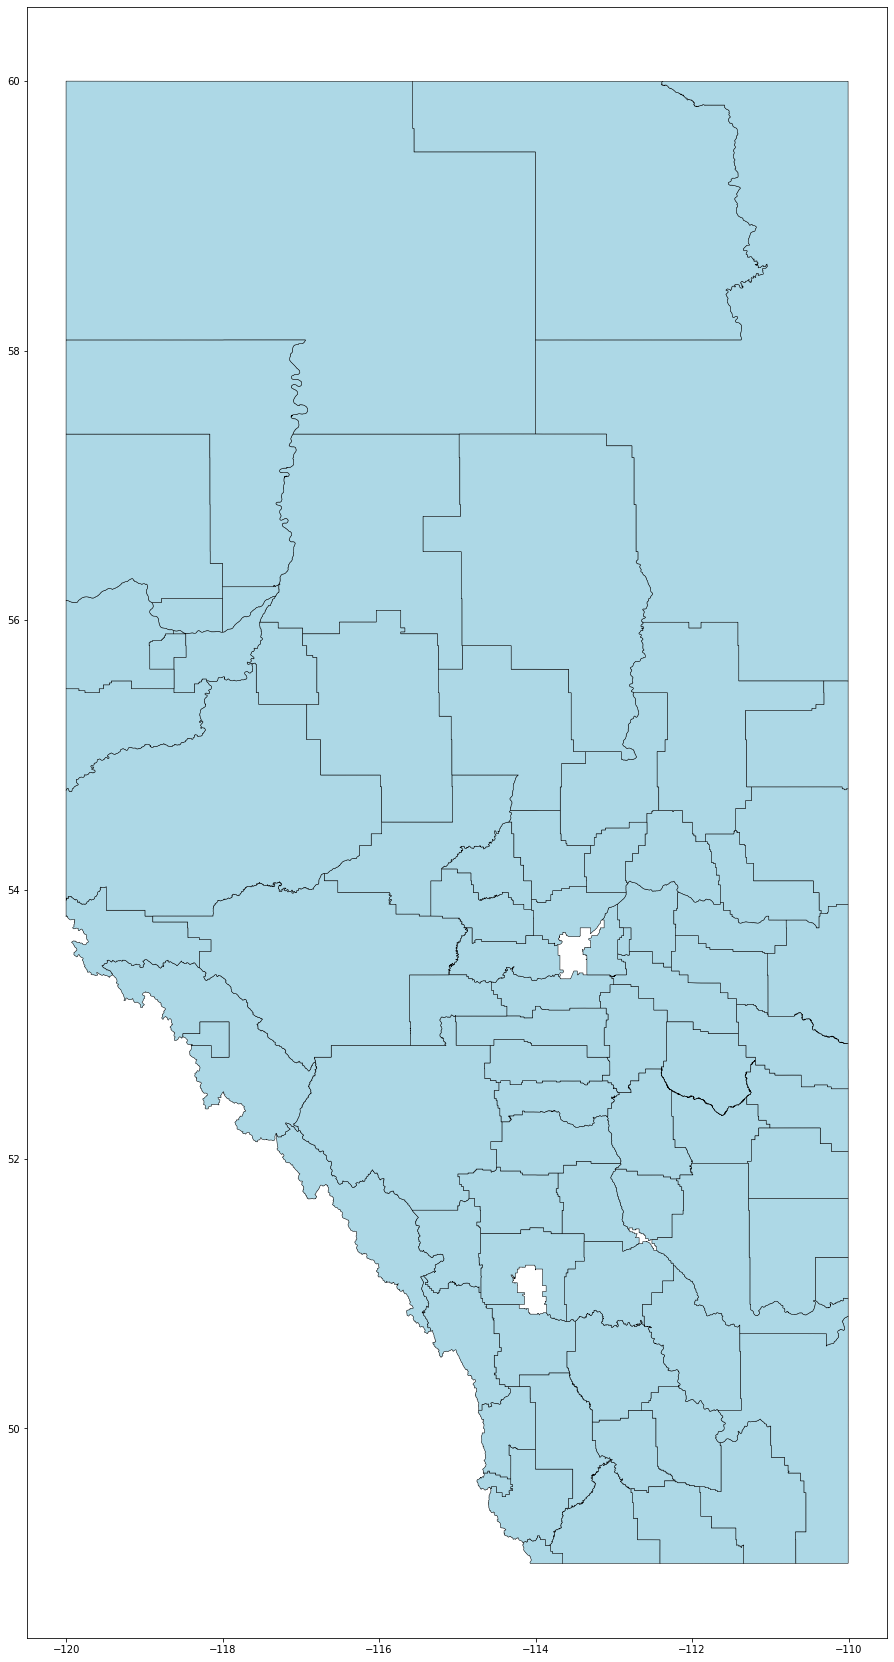

In [36]:
# sliced out rural alberta

ax = rural_df.plot(figsize=size, linewidth=lwidth, color="lightblue", edgecolor="black")
#city_df.plot(figsize=size, linewidth=lwidth, color="blue", edgecolor="black", ax=ax)

### Counting Tests
- How to count up the markers that fall within a certain polygon
- Just try counting up the markers for rural_df first